In [1]:
import torch 
import numpy as np


### Tensor

In [2]:
# In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.
# Tensors are similar to `NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators.

data = [[1,2],[3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [3]:
np_array = np.array(data)
x_data = torch.from_numpy(np_array)
x_data

tensor([[1, 2],
        [3, 4]])

In [4]:
x_ones = torch.ones_like(x_data)
x_rand = torch.rand_like(x_data , dtype=torch.float64)
x_rand

tensor([[0.5226, 0.1261],
        [0.0359, 0.3813]], dtype=torch.float64)

In [5]:
x_ones = torch.ones(3,1)
x_rand = torch.rand(5,3,2,3)
print(x_rand)
x_rand[1,2,1,2]

tensor([[[[0.5048, 0.2104, 0.7627],
          [0.7688, 0.3937, 0.7857]],

         [[0.7502, 0.8791, 0.2151],
          [0.4401, 0.4391, 0.7697]],

         [[0.4178, 0.3650, 0.3654],
          [0.1251, 0.4482, 0.3928]]],


        [[[0.6884, 0.1611, 0.4326],
          [0.1282, 0.7256, 0.6048]],

         [[0.5817, 0.2461, 0.4604],
          [0.0175, 0.7454, 0.0381]],

         [[0.1575, 0.6044, 0.0933],
          [0.1784, 0.0513, 0.8250]]],


        [[[0.1402, 0.0926, 0.7318],
          [0.7823, 0.8444, 0.5708]],

         [[0.1260, 0.2491, 0.8315],
          [0.5060, 0.0384, 0.1896]],

         [[0.1079, 0.5714, 0.2031],
          [0.8756, 0.4461, 0.7078]]],


        [[[0.4454, 0.8098, 0.3128],
          [0.0658, 0.2613, 0.6803]],

         [[0.0056, 0.5284, 0.5202],
          [0.1490, 0.1735, 0.5532]],

         [[0.2824, 0.0310, 0.0185],
          [0.9919, 0.5948, 0.5998]]],


        [[[0.0995, 0.8159, 0.4425],
          [0.4489, 0.0277, 0.9079]],

         [[0.6537, 0.4099, 0.8

tensor(0.8250)

In [6]:
tensor = torch.ones(4, 4)*np.random.randint(0,high =5,size=4)
tensor

tensor([[2., 0., 1., 2.],
        [2., 0., 1., 2.],
        [2., 0., 1., 2.],
        [2., 0., 1., 2.]], dtype=torch.float64)

In [7]:
y1 = torch.rand(5,5)
y2 = torch.rand(5,5)
y3 = y1@ y2
y3

tensor([[0.6640, 0.9683, 0.6693, 0.6794, 0.5661],
        [1.2584, 1.8085, 1.0757, 1.4322, 1.4315],
        [1.0446, 1.2151, 0.8466, 1.5526, 1.0203],
        [0.9072, 1.3049, 0.7175, 1.2513, 0.7704],
        [1.2174, 1.3528, 0.9440, 1.6691, 1.0261]])

In [8]:
z1 = torch.rand(5,5)
for i in z1.sum(1):
    print(f"items {i.item()}")


items 4.315885543823242
items 2.5053060054779053
items 2.7057764530181885
items 2.2533469200134277
items 3.026614189147949


In [9]:
z1.add_(5)

tensor([[5.9499, 5.9340, 5.6118, 5.9373, 5.8828],
        [5.4370, 5.5383, 5.6324, 5.8974, 5.0001],
        [5.5316, 5.2929, 5.3528, 5.5804, 5.9481],
        [5.5603, 5.8858, 5.1557, 5.2480, 5.4035],
        [5.0445, 5.7660, 5.8442, 5.5937, 5.7782]])

In [10]:
z1.copy_(y3)
z1

tensor([[0.6640, 0.9683, 0.6693, 0.6794, 0.5661],
        [1.2584, 1.8085, 1.0757, 1.4322, 1.4315],
        [1.0446, 1.2151, 0.8466, 1.5526, 1.0203],
        [0.9072, 1.3049, 0.7175, 1.2513, 0.7704],
        [1.2174, 1.3528, 0.9440, 1.6691, 1.0261]])

In [11]:
# Important : bridge-to-np-label, # Tensors on the CPU and NumPy arrays can share their underlying memory
# locations, and changing one will change	the other.

t= torch.ones(5)
nump = t.numpy()
print(f"data : {nump.sum().item()}")
t.add_(5)
print(f"data : {nump.sum().item()}")

data : 5.0
data : 30.0


### Dataloader

In [20]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import DataLoader

In [21]:
 training_data = datasets.FashionMNIST(
     root = "data",
     train = True,
     download = True,
     transform = ToTensor()
     
 )
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

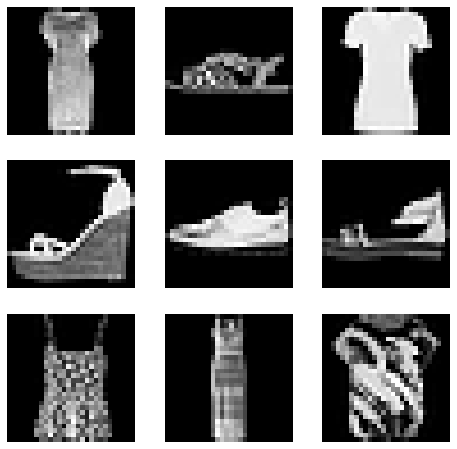

In [95]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols,rows =3,3
for i in range(1,cols*rows+1):
    sample_idx = torch.randint(len(training_data),size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()  

In [14]:
## custom dataset class 
class customDatasetClass(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
        self.image_labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = tarfet_transform
    
    def __len__():
        return len(self.image_labels)
    
    def __getitem__():
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


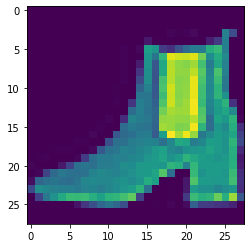

In [16]:
# iterate
train_dataloader = DataLoader(training_data,batch_size=64, shuffle = True)
test_dataloader = DataLoader(test_data,batch_size=64, shuffle = True)

imgs, labels = next(iter(train_dataloader))
plt.imshow(imgs[0].squeeze())

In [28]:
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y : torch.zeros(10, dtype = torch.float64).scatter_(dim=0,index=torch.tensor(y),value=1))
)
training_data


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()

### Building NN

In [23]:
#we'll build a neural network to classify images in the FashionMNIST dataset.

#Every module in PyTorch subclasses the `nn.Module'. A neural network is a module itself that consists 
# of other modules (layers).
import torch
from torch import nn
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms



device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
#print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10)
        )
    def forward(self,x):
        x = self.flatten(x)
        return self.linear_relu_stack(x)

    
model = NeuralNetwork().to(device)
#print(model)
X = torch.rand(1,28,28,device=device)
logits = model(X)
prob = nn.Softmax(dim=1)(logits)
logits.shape

torch.Size([1, 10])